In [1]:
%matplotlib inline
from model_v1 import *

## Pretraining - comp-o

##### Config

In [2]:
models = list(Path("../exp/train_unigram_1000_o").glob("*"))
criterion = "validation/main/cer_ctc"
ascending = True
logfiles = sum([list(model.glob("**/*/log")) for model in models], [])

rgx = re.compile(
    r"\.\.\/exp\/train_(?P<target>\w+)_(?P<dataset>\w+)\/"
    r"(?P<model_name>\w+)_(?P<elayers>\d)_(?P<dlayers>\d)_(?P<units>\d+)_"
    r"(?P<alpha>(?:a\.\d+)|(?:ctc)|(?:att))"
    r"(?:_do(?P<dropout_enc>\.\d+)(?:(?P<dropout_dec>\.\d+))?)?(?:_wd(?P<weight_decay>\d+))?"
)

# list(map(rgx.search, map(str, models)))

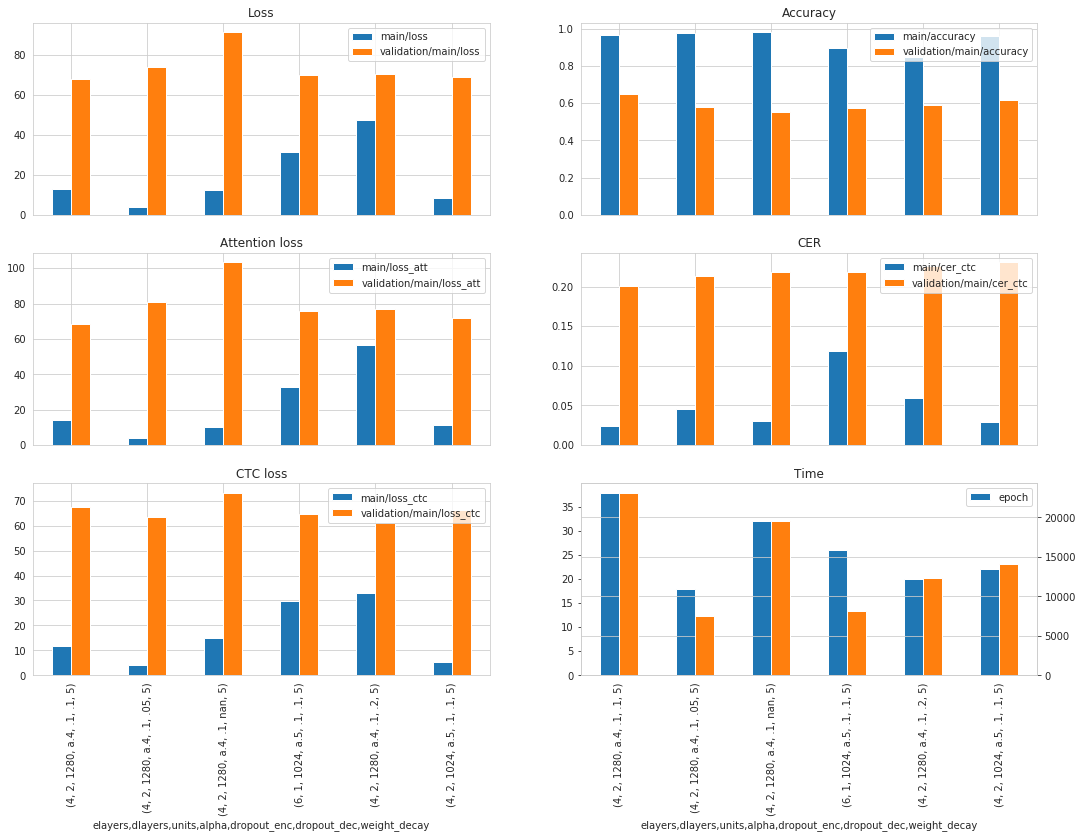

In [3]:
results = load_logs(*logfiles, parse_model=rgx)
plot_comparison(results, list(rgx.groupindex), criterion=criterion, ascending=ascending, nbests=6)
# plt.tight_layout()
# plt.savefig("../exp/graphs/comp_vgglstm_lg_unigram_1000_o.png", dpi=300)

# plot_training(results, nbests=5)
# plt.tight_layout()
# plt.savefig("../exp/graphs/train_vgglstm_lg_unigram_1000_o.png", dpi=300)

In [16]:
(results.set_index(list(regex.groupindex))
 .sort_values("validation/main/cer_ctc", ascending=True)
 .groupby("model_id").head(1)
 .head(10)
 .drop(["main/wer", "main/cer", "validation/main/wer", "validation/main/cer", "eps", "epoch"], axis=1))

main/loss  \
model_name target       dataset alpha dropout_enc dropout_dec weight_decay              
vgglstm    unigram_1000 o       a.4   .1          .1          5               13.0720   
                                                  .05         5                4.0959   
                                                  NaN         5               12.2006   
lstmp      unigram_1000 o       a.5   .1          .1          5               31.2555   
vgglstm    unigram_1000 o       a.4   .1          .2          5               47.2701   
                                a.5   .1          .1          5                8.3752   
                                a.4   .1          .05         5               40.4522   
lstmp      unigram_1000 o       a.5   .1          .1          5               25.8156   
vgglstm    unigram_1000 o       a.4   .1          .1          5               34.1144   
lstmp      unigram_1000 o       a.5   .1          .1          5               57.5077   

                                                                            main/loss_ctc  \
model_name target       dataset alpha dropout_enc dropout_dec weight_decay                  
vgglstm    unigram_1000 o       a.4   .1          .1          5                   11.8381   
                                                  .05         5                    3.9806   
                                                  NaN         5                   14.9518   
lstmp      unigram_1000 o       a.5   .1          .1          5                   29.8400   
vgglstm    unigram_1000 o       a.4   .1          .2          5                   32.9423   
                                a.5   .1          .1          5                    5.2802   
                                a.4   .1          .05         5                   25.8623   
lstmp      unigram_1000 o       a.5   .1          .1          5                   20.9575   
vgglstm    unigram_1000 o       a.4   .1          .1          5                   28.1268   
lstmp      unigram_1000 o       a.5   .1          .1          5                   53.1649   

                                                                            main/loss_att  \
model_name target       dataset alpha dropout_enc dropout_dec weight_decay                  
vgglstm    unigram_1000 o       a.4   .1          .1          5                   13.8947   
                                                  .05         5                    4.1729   
                                                  NaN         5                   10.3664   
lstmp      unigram_1000 o       a.5   .1          .1          5                   32.6709   
vgglstm    unigram_1000 o       a.4   .1          .2          5                   56.8220   
                                a.5   .1          .1          5                   11.4701   
                                a.4   .1          .05         5                   50.1788   
lstmp      unigram_1000 o       a.5   .1          .1          5                   30.6737   
vgglstm    unigram_1000 o       a.4   .1          .1          5                   38.1061   
lstmp      unigram_1000 o       a.5   .1          .1          5                   61.8504   

                                                                            main/accuracy  \
model_name target       dataset alpha dropout_enc dropout_dec weight_decay                  
vgglstm    unigram_1000 o       a.4   .1          .1          5                    0.9669   
                                                  .05         5                    0.9785   
                                                  NaN         5                    0.9810   
lstmp      unigram_1000 o       a.5   .1          .1          5                    0.8934   
vgglstm    unigram_1000 o       a.4   .1          .2          5                    0.8469   
                                a.5   .1          .1          5                    0.9612   
                             

## Pretraining - curriculum

o: 91 results
ok: 37 results
mono: 256 results
all: 348 results
Model was not evaluated?
Model was not evaluated?


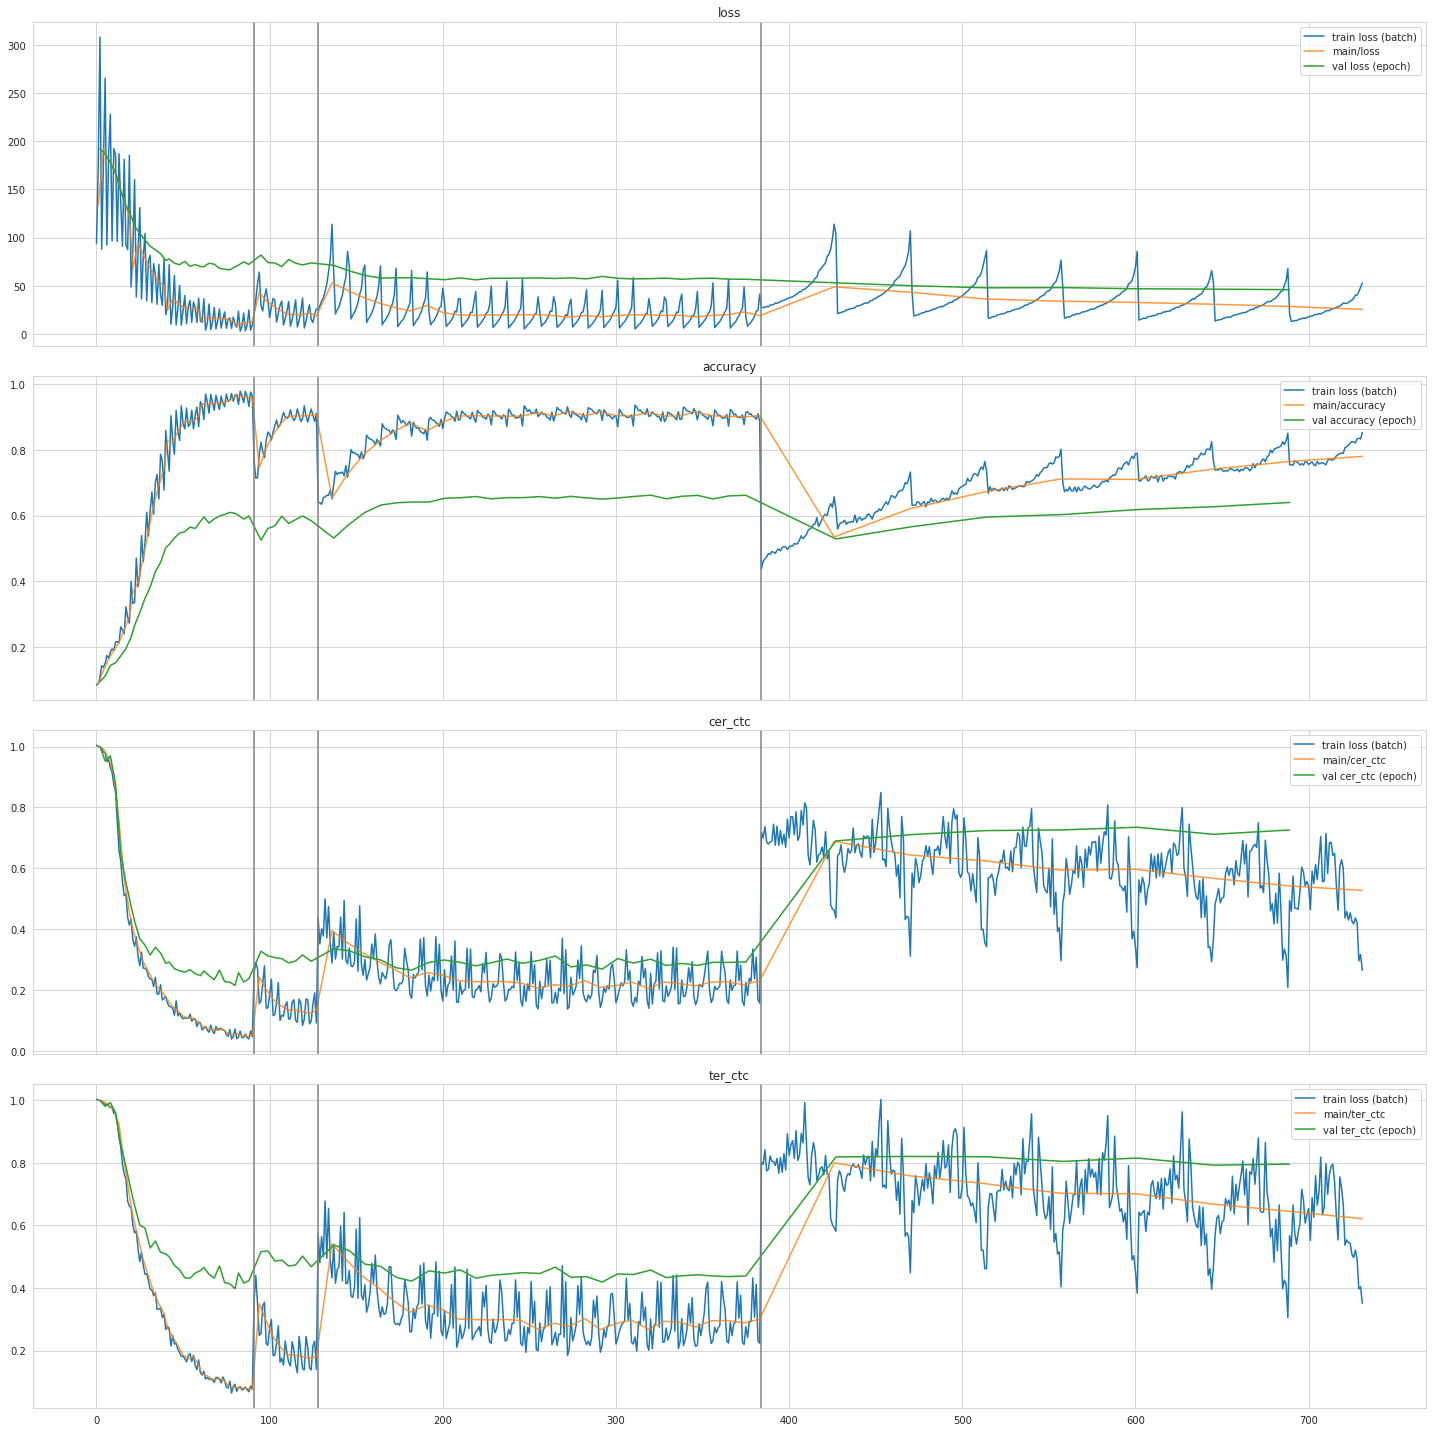

In [20]:
model_dir = "../exp/train_unigram_1000_curriculum/lstmp_6_1_1024_a.5_do.1.1_wd5"
nrows, ncols = 4, 1
_, axs = plt.subplots(nrows, ncols, figsize=(20,20), sharex=True)
summary = ModelSummary(model_dir, curriculum=True, evaluation=False)
for i, metric in enumerate(["loss", "accuracy", "cer_ctc", "ter_ctc"]):
    ax = axs[i // nrows, i % nrows] if (nrows > 1 and ncols > 1) else axs[i]
    summary.training_summary(metric=metric, ax=ax)
    ax.set_title(metric); ax.set_xlabel("")
plt.tight_layout()

In [35]:
test_scores = (eval_results[["train_set", "test_split", *metrics]]
               .assign(train_set=pd.Categorical(eval_results["train_set"], train_sets))
               .set_index(["train_set", "test_split"])
               .stack(0).rename("score")
               .reset_index()
               .rename(columns={"level_2": "metric"})
               .groupby(["train_set", "test_split", "metric"])
               .mean().unstack(level=1))

# test_scores.pivot(columns="metric", values="score", index=["train_set", "test_split"])
test_scores

score                                                   \
test_split             a      b      f      g      h      i      j      k   
train_set metric                                                            
o         cer_ctc 1.2935 1.2997 1.0566 1.0059 1.0167 0.9493 0.7185 0.6560   
          cer_dec 0.7724 0.7002 0.6631 0.7065 0.6925 0.7575 0.6351 0.6009   
          ter_ctc 1.8759 1.8774 1.5931 1.6144 1.6251 1.4928 1.1609 1.0410   
          ter_dec 1.0459 0.9816 0.9119 0.9740 0.9733 1.0205 0.8716 0.8136   
ok        cer_ctc 1.2825 1.2613 0.9603 0.8791 0.9542 0.8602 0.5810 0.4778   
          cer_dec 0.7648 0.6866 0.6140 0.6644 0.6778 0.6657 0.5224 0.4160   
          ter_ctc 1.7822 1.7437 1.3401 1.3252 1.4298 1.2308 0.8863 0.7220   
          ter_dec 1.0181 0.9425 0.8100 0.8717 0.9184 0.8764 0.6924 0.5410   
mono      cer_ctc 0.9777 1.0120 0.7490 0.6011 0.7758 0.6572 0.4792 0.4522   
          cer_dec 0.7153 0.6201 0.4869 0.5130 0.5679 0.4113 0.3552 0.3019   
          ter_ctc 1.2206 1.3295 0.9474 0.8227 1.0347 0.8074 0.6504 0.6121   
          ter_dec 0.9415 0.8352 0.6297 0.6757 0.7580 0.5021 0.4560 0.3862   
all       cer_ctc 0.9024 0.7677 0.7309 0.5353 0.7031 0.7419 0.6141 0.6331   
          cer_dec 0.5007 0.3561 0.3363 0.3133 0.2935 0.3264 0.2352 0.2269   
          ter_ctc 0.9466 0.8270 0.7970 0.6244 0.7803 0.8058 0.6856 0.7047   
          ter_dec 0.6098 0.4231 0.4139 0.3896 0.3681 0.3885 0.3008 0.2828   

                                               
test_split             l      m      n      o  
train_set metric                               
o         cer_ctc 0.6453 0.6737 0.9080 0.2400  
          cer_dec 0.5565 0.6890 0.6530 0.2957  
          ter_ctc 1.0441 0.9691 1.4014 0.4316  
          ter_dec 0.7711 0.9168 0.8985 0.4067  
ok        cer_ctc 0.5381 0.5899 0.8512 0.2227  
          cer_dec 0.4583 0.6030 0.6237 0.2631  
          ter_ctc 0.8308 0.8356 1.2548 0.3985  
          ter_dec 0.6203 0.8162 0.8400 0.3609  
mono      cer_ctc 0.4131 0.3102 0.7026 0.2127  
          cer_dec 0.3106 0.2801 0.5099 0.2178  
          ter_ctc 0.5770 0.4568 0.9493 0.3665  
          ter_dec 0.4131 0.3681 0.6741 0.3009  
all       cer_ctc 0.5533 0.3388 0.6149 0.2036  
          cer_dec 0.2160 0.1684 0.3007 0.1520  
          ter_ctc 0.6379 0.4363 0.7206 0.3283  
          ter_dec 0.2819 0.2190 0.3863 0.2135

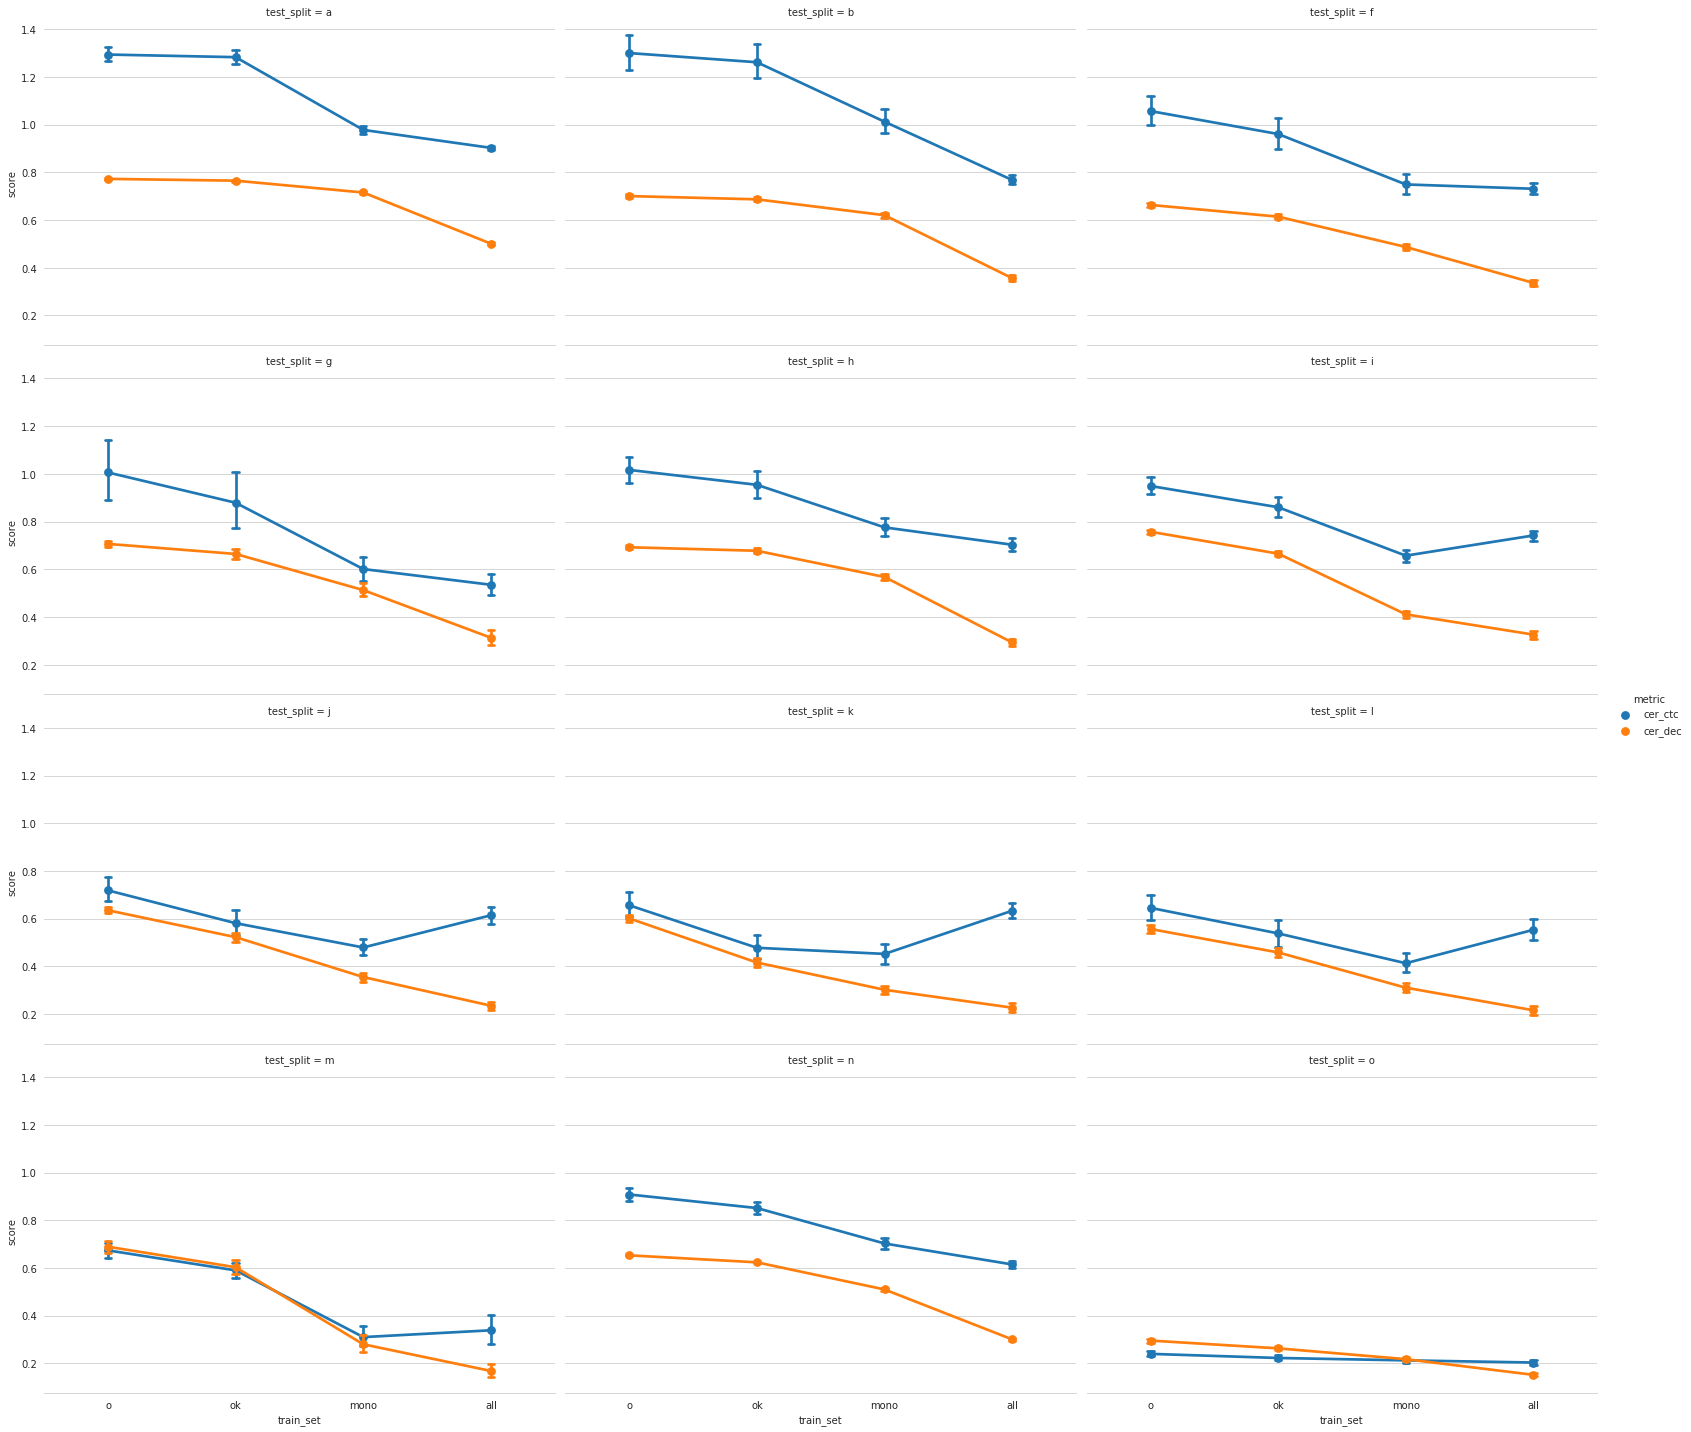

In [37]:
model_dir = "../exp/train_unigram_1000_curriculum/lstmp_6_1_1024_a.5_do.1.1_wd5"
eval_results = get_evaluation_results(model_dir)

metrics = ["cer_ctc", "cer_dec"]  #, "ter_ctc", "ter_dec"]
train_sets = ["o", "ok", "mono", "all"]
test_split = list("abfghijklmno")

# fig, axs = plt.subplots(4, 3, figsize=(20,20))
# for i, test_set in enumerate(eval_results.test_split.unique()):
#     sel = test_scores.loc[test_scores.test_split == test_set]
#     sns.boxplot(x="train_set", y="score", hue="metric", data=test_scores, ax=axs[i%3, i//3])
#     break

sns.catplot(x="train_set", y="score", hue="metric", col="test_split", data=(
    eval_results.assign(train_set=pd.Categorical(eval_results["train_set"], train_sets))
    .loc[(eval_results.train_set.isin(train_sets) & eval_results.test_split.isin(test_split)), 
         ["train_set", "test_split", *metrics]]
    .set_index(["train_set", "test_split"])
    .swaplevel(0, 1, axis=0)
    .stack(level=0)
    .reset_index()
    .rename(columns={"level_2": "metric", 0: "score"})
), col_wrap=3, kind="point", capsize=.05, aspect=1.5).despine(left=True);

# plt.savefig(f"{model_dir}/test_scores.png", dpi=800)

# (eval_results[["train_set", "test_split", *metrics]]
#  .assign(train_set=pd.Categorical(eval_results["train_set"], train_sets)))

## Training

### vanilla

- started: 04/17 12:19:17
- config: conf/train_ep1000_es5.yaml
- batch size: 64
- epoch: 1000
- early stop: yes
- patience: 5
- sortagrad: 0
- preprocess: none

o: 91 results
ok: 37 results
mono: 256 results
all: 960 results
Model was not evaluated?
Model was not evaluated?


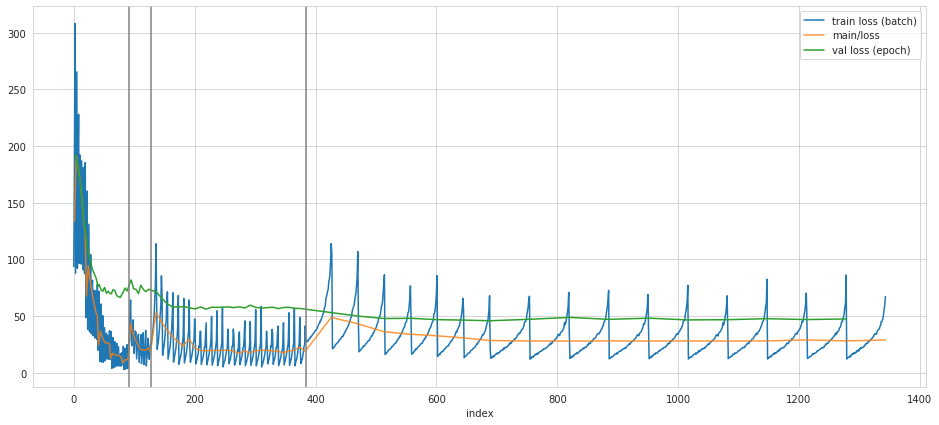

In [15]:
summary = ModelSummary("../exp/train_unigram_1000_curriculum/lstmp_6_1_1024_a.5_do.1.1_wd5")
summary.training_summary()

In [16]:
summary.evaluation_summary()

### fast

- started: 04/21 09:12:04
- config: conf/train_ep1000_es5_fast.yaml
- batch size: 256
- epoch: 1000
- early stop: yes
- patience: 5
- sortagrad: 0
- preprocess: none

Model was not evaluated?
Model was not evaluated?


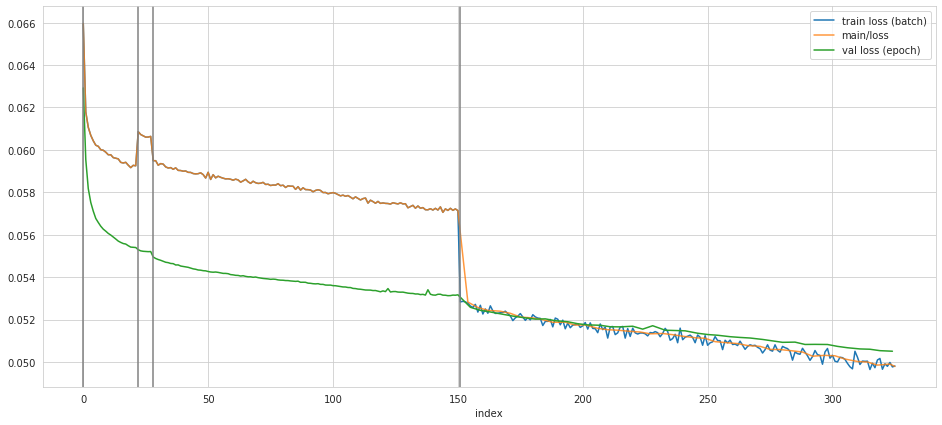

In [6]:
summary = ModelSummary("../exp/train_lstm_words_pretrained_curriculum/v2")
summary.training_summary()

### sorted

- started: 04/20 11:55:42
- config: conf/train_ep1000_es5_sorted.yaml
- batch size: 128
- epoch: 1000
- early stop: yes
- patience: 5
- sortagrad: -1
- preprocess: none

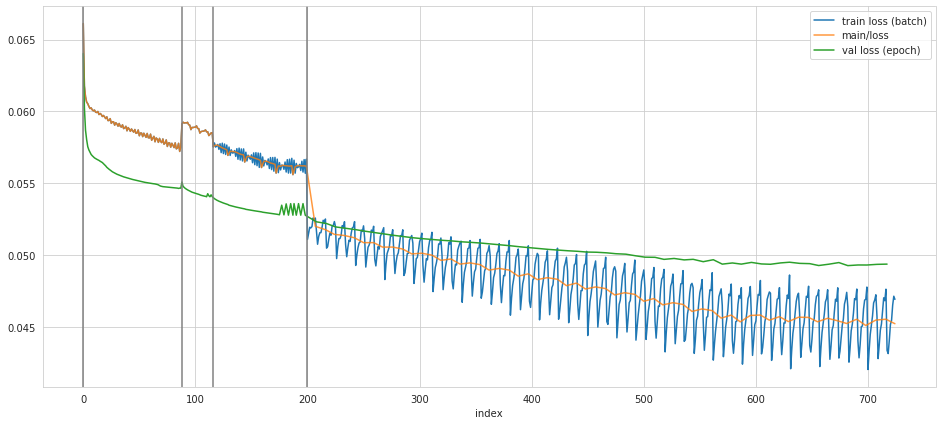

In [7]:
summary = ModelSummary("../exp/train_lstm_words_pretrained_curriculum/sorted")
summary.training_summary()

,accuracy,wer,loss
dataset,,,
a,0.0908,0.9084,0.0491
b,0.1555,0.8412,0.0440
f,0.1172,0.8803,0.0494
g,0.1262,0.8732,0.0517
h,0.1161,0.8819,0.0508
i,0.0814,0.9169,0.0541
j,0.1395,0.8583,0.0515
k,0.1376,0.8615,0.0584
l,0.1502,0.8477,0.0534


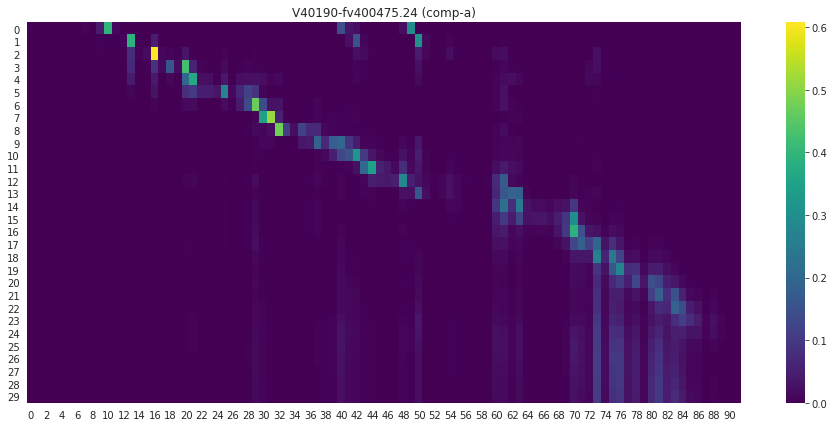

In [8]:
summary.evaluation_summary()

### SpecAugment

- started: 04/21 09:12:04
- config: conf/train_ep1000_es5_sorted.yaml
- batch size: 128
- epoch: 1000
- early stop: yes
- patience: 5
- sortagrad: 0
- preprocess: conf/specaug.yaml

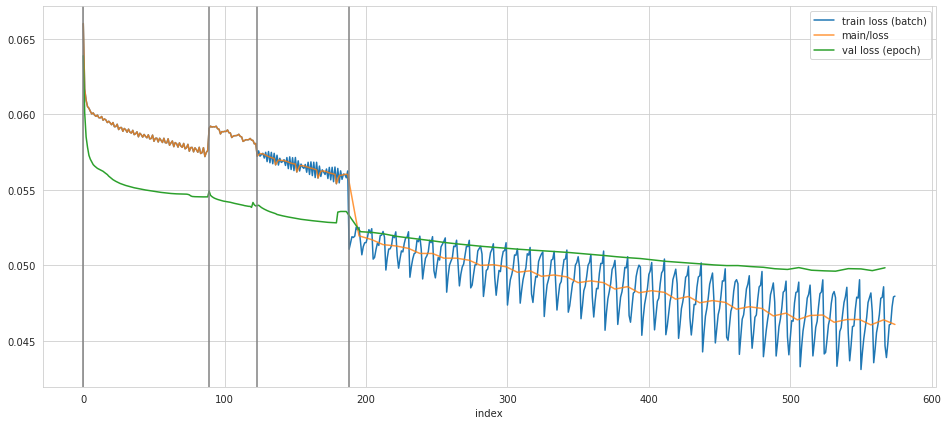

In [9]:
summary = ModelSummary("../exp/train_lstm_words_pretrained_curriculum/specaug")
summary.training_summary()

,accuracy,wer,loss
dataset,,,
a,0.0837,0.9155,0.0492
b,0.1464,0.8506,0.0443
f,0.1025,0.8949,0.0498
g,0.1165,0.8832,0.0520
h,0.1033,0.8951,0.0512
i,0.0737,0.9258,0.0545
j,0.1251,0.8729,0.0520
k,0.1242,0.8742,0.0589
l,0.1354,0.8627,0.0538


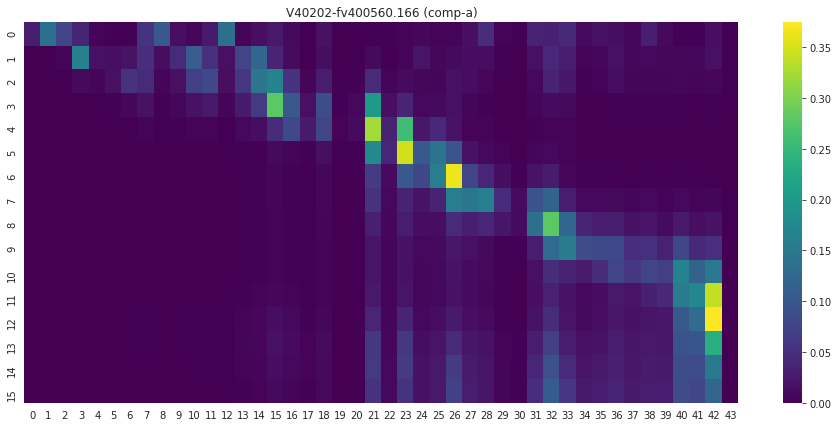

In [9]:
summary.evaluation_summary()

## Evaluation

In [186]:
def load_batch(batch_nr):
    result_dir = Path(model_dir, "evaluate", "results")
    output_files = list(result_dir.glob("*.npy"))
    
    attn_weights = np.load(list(filter(lambda p: p.stem == f"att_weights_batch{i}", output_files))[0])
    ids = np.load(list(filter(lambda p: p.stem == f"id_batch{i}", output_files))[0])
    targets = np.load(list(filter(lambda p: p.stem == f"target_batch{i}", output_files))[0])
    target_lengths = np.load(list(filter(lambda p: p.stem == f"target_lengths{i}", output_files))[0])
    preds = np.load(list(filter(lambda p: p.stem == f"predictions_batch{i}", output_files))[0])

    return {
        "attention": attn_weights,
        "uttids": ids,
        "targets": targets,
        "target_lengths": target_lengths,
        "predictions": preds
    }

def score(y_pred, y_true, ylen):
    return ((y_pred[:ylen] - y_true[:ylen]) ** 2).mean()

def batch_scores(batch):
    return np.array([score(
        batch["predictions"][i], 
        batch["targets"][i],
        batch["target_lengths"][i]
    ) for i in range(len(batch["predictions"]))])


In [1]:
# with open("../dump/CGN_test/deltafalse/data_words.all.json") as f:
#     test_set = json.load(f)["utts"]
    
# batch = load_batch(0)

In [2]:
# batch_scores(batch)

In [3]:
# batch["targets"][-1].shape, batch["predictions"][-1].shape

In [4]:
# i = -1
# sns.heatmap(batch["attention"][i][:batch["target_lengths"][i]], cmap="Blues");

In [190]:
def Embedding(num_embeddings, embedding_dim, eos_idx, eos_value=0):
    m = nn.Embedding(num_embeddings, embedding_dim)
    nn.init.uniform_(m.weight, -0.1, 0.1)
    nn.init.constant_(m.weight[eos_idx], eos_value)
    return m


def load_pretrained_embedding_from_file(embed_path, vocab, freeze=True, eos_idx=-1, eos_value=0):
    vocab = vocab.copy()
    num_embeddings = len(vocab)
    # eos_idx MUST be -1 (= the last one) otherwise, we will have a clash with the other indices
    # Note: can be easily solved in load_embedding, but does not matter a.t.m.
    assert eos_idx == -1 or eos_idx == num_embeddings - 1
    embed_dict = parse_embedding(embed_path)
    embed_dim = embed_dict[list(embed_dict)[0]].size(0)
    embed_tokens = Embedding(num_embeddings, embed_dim, eos_idx, eos_value)
    embed_tokens.weight.requires_grad = not freeze
    return load_embedding(embed_dict, vocab, embed_tokens)


def load_embedding(embed_dict, vocab, embedding):
    """[From fairseq]"""
    for idx in range(len(vocab)):
        token = vocab[idx]
        if token in embed_dict:
            embedding.weight.data[idx] = embed_dict[token]
    return embedding


def parse_embedding(embed_path):
    """[From fairseq] Parse embedding text file into a dictionary of word and embedding tensors.
    The first line can have vocabulary size and dimension. The following lines
    should contain word and embedding separated by spaces.
    Example:
        2 5
        the -0.0230 -0.0264  0.0287  0.0171  0.1403
        at -0.0395 -0.1286  0.0275  0.0254 -0.0932
    """
    embed_dict = {}
    with open(embed_path, encoding='utf-8') as f_embed:
        next(f_embed)  # skip header
        for line in f_embed:
            pieces = line.rstrip().split(" ")
            embed_dict[pieces[0]] = torch.Tensor(
                [float(weight) for weight in pieces[1:]]
            )
    return embed_dict

In [5]:
# with open(Path(model_dir, "train/all/results/model.json")) as jsonfile:
#     idim, odim, model_config = json.load(jsonfile)

# target_dict = model_config["char_list"]
    
# EMB_PATH = "/esat/spchdisk/scratch/qmeeus/repos/espnet/egs/cgn/asr1/data/lang_word/w2v_small.txt"
# embed_token = load_pretrained_embedding_from_file(
#     EMB_PATH, target_dict, freeze=True, eos_idx=-1
# )

# embed_token

In [206]:
import torch.nn.functional as F
from sklearn.neighbors import KNeighborsClassifier

def encode(tokens):
    vocab_size = 52165
    return F.one_hot(tokens, vocab_size)

emb_weights = 

tokens = torch.tensor([target_dict.index(w) for w in "ik ben blij".split()])
encoded = encode(tokens)
embedded = embed_token(tokens)

In [215]:
clf = KNeighborsClassifier(n_neighbors=1).fit(embed_token.weight, np.arange(len(target_dict)))

In [6]:
# sns.heatmap(target0_emb[0,:target_lengths[0]])

In [7]:
# sns.heatmap(torch.from_numpy(pred0[0,:target_lengths[0]]))

In [ ]:
targets = [np.load(p) for p in result_dir.glob("target_batch*.npy")]
predictions = [np.load(p) for p in result_dir.glob("predictions_batch*.npy")]